### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

## 2. Investigate the dataset for missing or problematic data.

In [7]:
data_nulls = data.isnull().sum()  # check null values's distributions 
print(data_nulls)
data.shape  # campare to the shape's size of the dataframe

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


(12684, 26)

In [8]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [9]:
#use function to show number of rows and columns, list of variables, types, and unique values 
def describe_dataframe(df):
    print("## Rows:", df.shape[0])
    print("## Columns:", df.shape[1])
    print()

    for column in data.columns:
        # Display first 10 unique values for each column
        unique_values = df[column].dropna().unique()[:10]
        unique_values_str = ', '.join([str(val) for val in unique_values])
        
        # Column data type
        dtype_str = "<chr>" if df[column].dtype == object else "<int>" if df[column].dtype == int else "<float>"
        
        # Print column information
        print(f"## $ {column:15} {dtype_str} {unique_values_str}, ...")

In [10]:
df = data

In [11]:
describe_dataframe(df)

## Rows: 12684
## Columns: 26

## $ destination     <chr> No Urgent Place, Home, Work, ...
## $ passanger       <chr> Alone, Friend(s), Kid(s), Partner, ...
## $ weather         <chr> Sunny, Rainy, Snowy, ...
## $ temperature     <float> 55, 80, 30, ...
## $ time            <chr> 2PM, 10AM, 6PM, 7AM, 10PM, ...
## $ coupon          <chr> Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant(20-50), ...
## $ expiration      <chr> 1d, 2h, ...
## $ gender          <chr> Female, Male, ...
## $ age             <chr> 21, 46, 26, 31, 41, 50plus, 36, below21, ...
## $ maritalStatus   <chr> Unmarried partner, Single, Married partner, Divorced, Widowed, ...
## $ has_children    <float> 1, 0, ...
## $ education       <chr> Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School, ...
## $ occupation      <chr> Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare S

In [87]:
# check for duplicate records
duplicate_rows = data.duplicated().sum()
duplicate_rows

74

In [88]:
# remove duplicate reords
data = data.drop_duplicates()

In [85]:
## practice the data profile report tip learned from Vikesh's Office Hour. It is working. Yeah! 

from pandas_profiling import ProfileReport

# Assuming 'data' is your DataFrame
profile = ProfileReport(data)
profile.to_file(output_file='output.html')
profile

C:\Users\17135\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning:

Try running command: 'pip install --upgrade Pillow' to avoid ValueError



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# drop 'car' varible due to the fact that 12576 out of 12684 records are missing values.
# drop all other null values from 'Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', and "Restaurant20To50"
# data.drop('car', axis=1, inplace=True).dropna()

## 4. What proportion of the total observations chose to accept the coupon? 



In [94]:
CouponAcceptRate = data["Y"].sum() / data.shape[0] ## data["Y"].mean() works too.
print("Coupon Acceptance Rate:", CouponAcceptRate)

Coupon Acceptance Rate: 0.5675654242664552


## 5. Use a bar plot to visualize the `coupon` column.

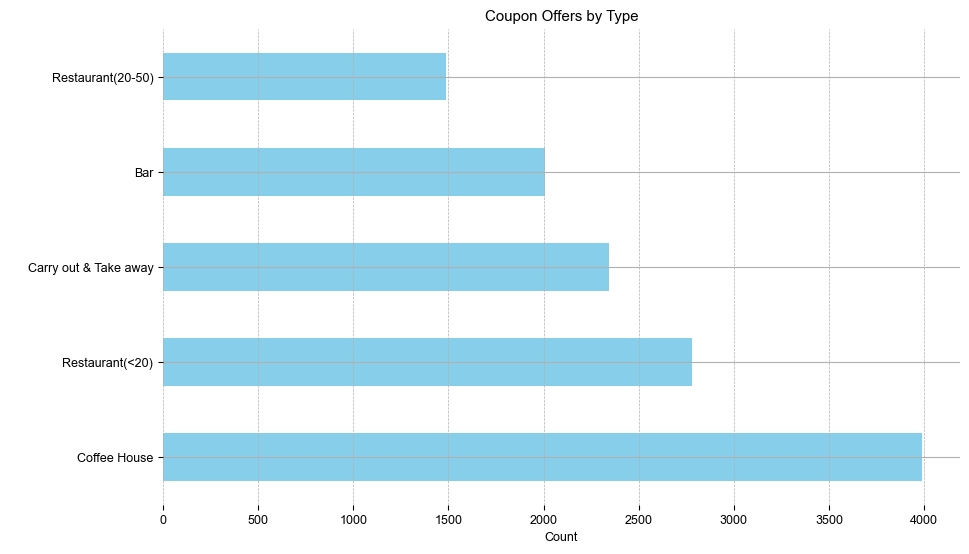

In [89]:
# Use Panda Plot method to draw a good looking bar chart to display Coupon populaton by 'Coupon' column.

plt.figure(figsize=(10, 6))
Fig = data['coupon'].value_counts().plot(kind='barh',color ='skyblue', title ='Coupon Offers by Type', grid =True, xlabel = 'Count', ylabel = " ", edgecolor = 'none')

# remove the four urgly black boundary lines. 

Fig.spines['top'].set_visible(False)
Fig.spines['right'].set_visible(False)
Fig.spines['bottom'].set_visible(False)
Fig.spines['left'].set_visible(False)

# change the grid style
Fig.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

# adjust the layout for readibility.
plt.tight_layout(pad=2)
plt.subplots_adjust(top=0.9)

# change the font style and size
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Comic Sans MS']
plt.rcParams.update({'font.size': 15})

# save the chart for read me report.
plt.savefig('coupon_breakdown_char1t.png', dpi=300)

## 5.1 Create a new object column "Accepted"to make future visualizations more readable.

In [ ]:
# use apply method to create a new category variable 'Accepted'
data['Accepted'] = data['Y'].apply(lambda x: 'Yes' if x == 1 else 'No') 


## 5.2 Plot to see how drivers accepted different types of coupons

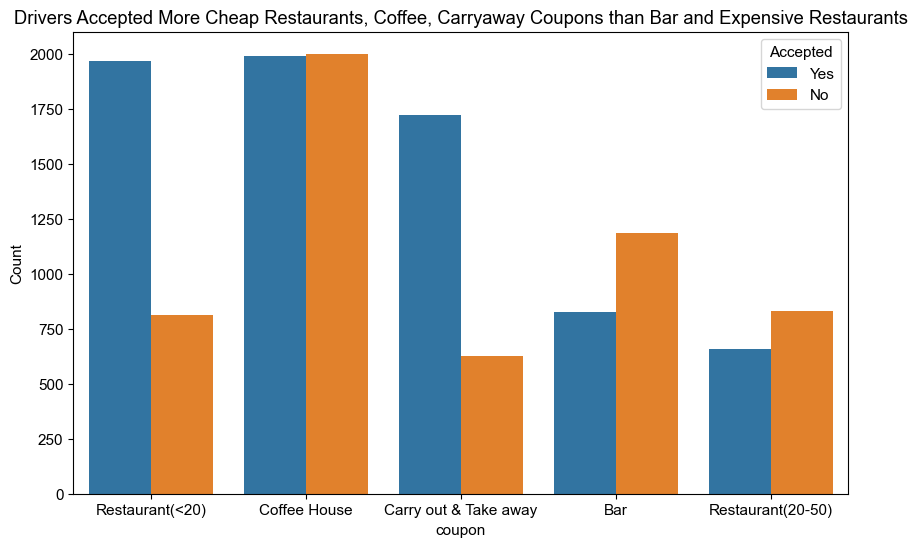

In [208]:
# practice seaborn plot method
# please read the plot's title for insights.

plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', hue='Accepted', data=data)
plt.title('Drivers Accepted More Cheap Restaurants, Coffee, Carryaway Coupons than Bar and Expensive Restaurants')
plt.ylabel('Count')

# change the font style and size.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Comic Sans MS']
plt.rcParams.update({'font.size': 11})
plt.show()


## 5.3 Compute coupon acceptance rates by coupon type
this step helps me decide to work on 'Carry out' coupon (the most acceptable coupon)  to work next, after 'Bar' coupon analysis, Bar coupons are the least acceptable one.

In [95]:
# use group by and mean to caculate the rates.

acceptance_rates = data.groupby('coupon')['Y'].mean()
print(acceptance_rates)

coupon
Bar                      0.409950
Carry out & Take away    0.733788
Coffee House             0.498621
Restaurant(20-50)        0.441532
Restaurant(<20)          0.707809
Name: Y, dtype: float64


## 5.4 Plot coupon acceptance rates by coupon type, and add the coupon rate (caculated on Step 4) line on the plot

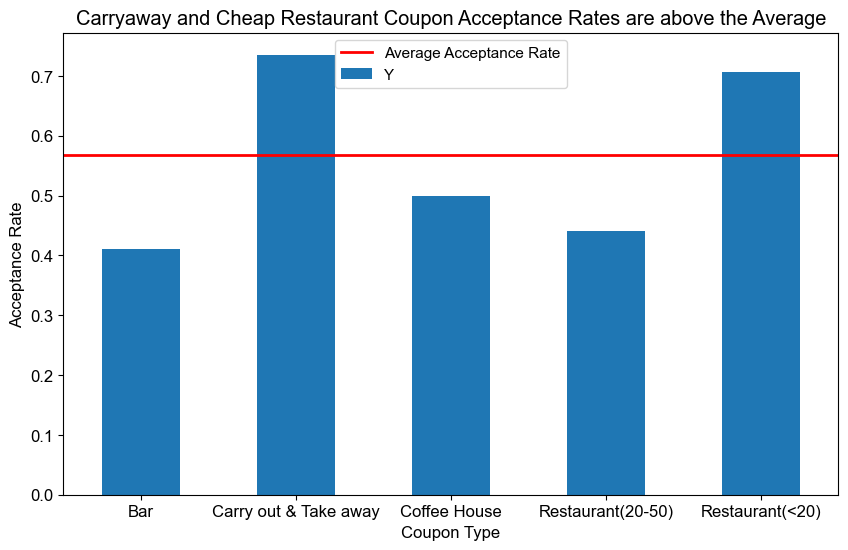

In [61]:
# use panda plot
# read the title for insights.

plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar')
plt.title('Carryaway and Cheap Restaurant Coupon Acceptance Rates are above the Average')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')

#change font style and size.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Comic Sans MS']
plt.rcParams.update({'font.size': 11})

# compute and add the average line to the plot for reference.
avg = data["Y"].mean()  # Example value, adjust as necessary
plt.axhline(y=avg, color='r', linestyle='-', linewidth=2, label='Average Acceptance Rate')

# Adding a legend to explain what the line represents
plt.legend()

plt.show()


## 5.6 Inspired by Step 5, I want to examine other coupon related attributes to practice probability analysis and data visualization skills.

In [96]:
# Compute coupon acceptance rate by type and expiration time. 
grouped_data_expiration = data.groupby(['coupon', 'expiration'] )['Y'].mean()
grouped_data_expiration

coupon                 expiration
Bar                    1d            0.412106
                       2h            0.402626
Carry out & Take away  1d            0.781006
                       2h            0.662379
Coffee House           1d            0.583097
                       2h            0.431716
Restaurant(20-50)      1d            0.521511
                       2h            0.299065
Restaurant(<20)        1d            0.831236
                       2h            0.591036
Name: Y, dtype: float64

<Figure size 1400x800 with 0 Axes>

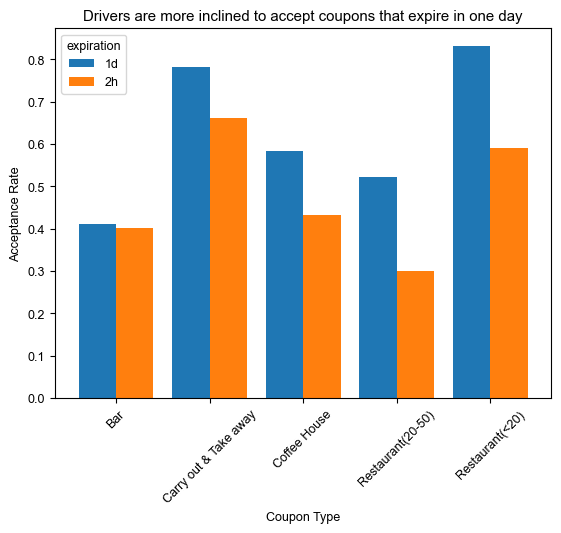

In [211]:
## reset the index of the DataFrame to the default integer index 
grouped_data_reset = grouped_data_expiration.reset_index()

## use the pivot() method to transform the DataFrame grouped_data_reset into a pivot table for visualization purpose
pivot_data_expiration = grouped_data_reset.pivot(index='coupon', columns='expiration', values='Y')

# Plotting
plt.figure(figsize=(14, 8))

pivot_data_expiration.plot(kind='bar', width=0.8)  # Adjust width as necessary for appearance

# Customization
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Comic Sans MS']
plt.rcParams.update({'font.size': 9})
plt.title('Drivers are more inclined to accept coupons that expire in one day')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)


plt.show()

## 5.7 Explore the impact of coupon time on coupon acceptance rates to practice probability analysis and data visualization skills.

In [97]:
grouped_data_time = data.groupby(['time', 'coupon'] )['Y'].mean()
grouped_data_time

time  coupon               
10AM  Bar                      0.361174
      Carry out & Take away    0.700971
      Coffee House             0.640312
      Restaurant(20-50)        0.616071
      Restaurant(<20)          0.709571
10PM  Bar                      0.458647
      Carry out & Take away    0.758170
      Coffee House             0.424242
      Restaurant(20-50)        0.328947
      Restaurant(<20)          0.504310
2PM   Bar                      0.338983
      Carry out & Take away    0.866972
      Coffee House             0.547289
      Restaurant(20-50)        0.535912
      Restaurant(<20)          0.814655
6PM   Bar                      0.467140
      Carry out & Take away    0.824480
      Coffee House             0.410846
      Restaurant(20-50)        0.502577
      Restaurant(<20)          0.827540
7AM   Bar                      0.365503
      Carry out & Take away    0.646732
      Coffee House             0.445783
      Restaurant(20-50)        0.400468
      Restau

<Figure size 2000x800 with 0 Axes>

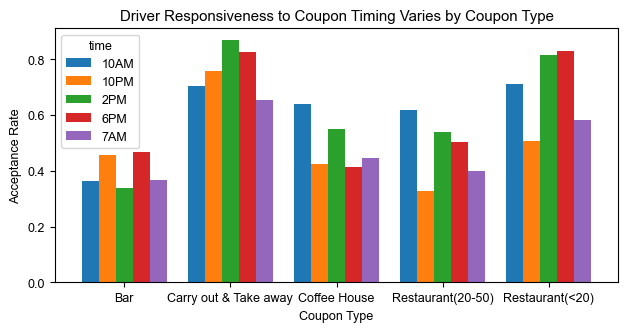

In [22]:
# reset index
# pivot data for data visualization
grouped_data_reset1 = grouped_data_time.reset_index()
pivot_data_time = grouped_data_reset1.pivot(index='coupon', columns='time', values='Y')

plt.figure(figsize=(20, 8))
# Plotting
pivot_data_time.plot(kind='bar', width=0.8)  # Adjust width as necessary for appearance

# Customization
Fig.spines['top'].set_visible(False)
Fig.spines['right'].set_visible(False)
Fig.spines['bottom'].set_visible(False)
Fig.spines['left'].set_visible(False)
Fig.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout(pad=2)
plt.subplots_adjust(top=0.9)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Comic Sans MS']
plt.rcParams.update({'font.size': 9})
plt.title('Driver Responsiveness to Coupon Timing Varies by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=0)

plt.show()

## 6. Use a histogram to visualize the temperature column.

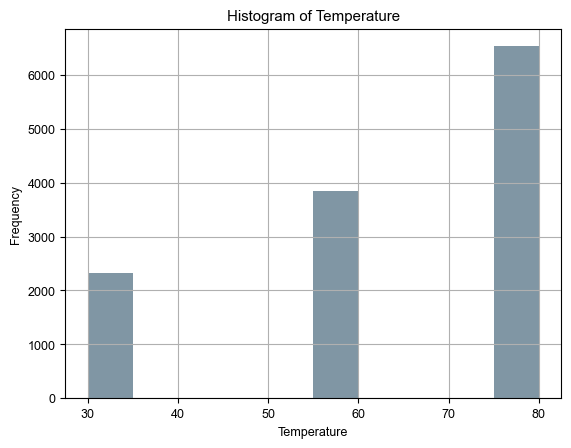

In [23]:
# use panda hist to see the distribution of numberical tempeature variable.
data['temperature'].hist(grid=True, alpha = 0.8, color='#607c8e')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## 6.1 Plot a histogram of temperature by weather type
rainy and snowy days are not representative enough. so I decided to ignor the varible totally for bar and carry out coupon analysis

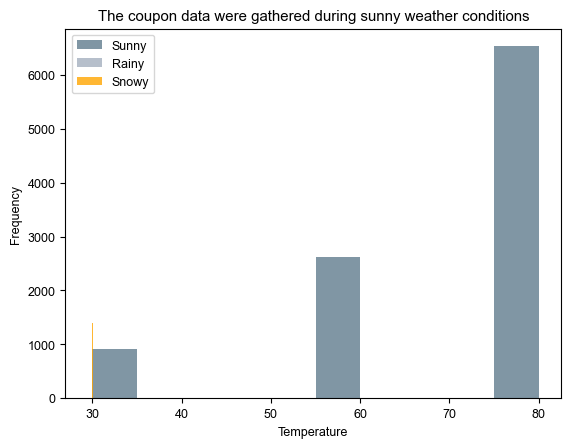

In [24]:
# create subsets of data for visualization
Sunny = data[data['weather'] == 'Sunny']['temperature']
Rainy = data[data['weather'] == 'Rainy']['temperature']
Snowy = data[data['weather'] == 'Snowy']['temperature']

# plot three histograms together labelled by weather type
plt.hist(Sunny, alpha=0.8, color='#607c8e', label='Sunny')
plt.hist(Rainy, alpha=0.8, color='#a4b0be', label='Rainy')
plt.hist(Snowy, alpha=0.8, color='orange', label='Snowy')
plt.title('The coupon data were gathered during sunny weather conditions')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 6.2 Plot a histogram of temperature by couplon acceptance

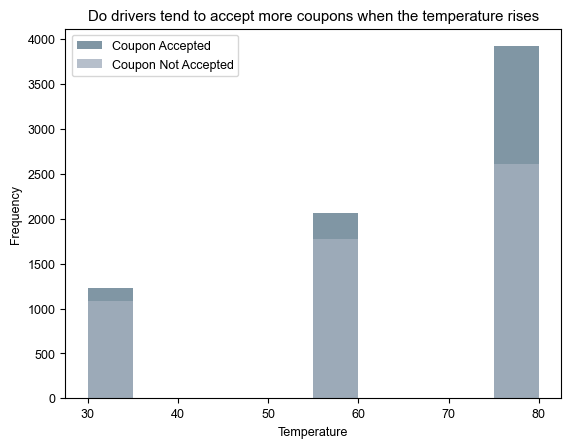

In [26]:
# create two subsets of data by temperature
accepted = data[data['Y'] == 1]['temperature']
not_accepted = data[data['Y'] == 0]['temperature']

# plot them together labelled by coupon acceptance outcome
plt.hist(accepted, alpha=0.8, color='#607c8e', label='Coupon Accepted')
plt.hist(not_accepted, alpha=0.8, color='#a4b0be', label='Coupon Not Accepted')

# customizatin
plt.title('Do drivers tend to accept more coupons when the temperature rises')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [98]:
# create a bar coupon only data frame
BarCouponOnly = data[data["coupon"] == "Bar"]

# check and drop the null values
print("Before Drop null values:", BarCouponOnly.shape)
BarCoupons_nulls =BarCouponOnly.isnull().sum()  
print(BarCoupons_nulls)
BarCouponOnly =BarCouponOnly.dropna()
print("after drop null values:", BarCouponOnly.shape)

Before Drop null values: (2010, 26)
destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     21
CoffeeHouse             39
CarryAway               24
RestaurantLessThan20    23
Restaurant20To50        36
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
Accepted                 0
dtype: int64
after drop null values: (1906, 26)


## 2. What proportion of bar coupons were accepted?


In [99]:
# Compute the proportion using sum and shape
BarCouponAcceptProportion = BarCouponOnly["Y"].sum() / BarCouponOnly.shape[0]
print("Proportion of Bar Coupons Accepted:", BarCouponAcceptProportion)

# compute the average bar coupons acceptence using mean method 
AvgBarCouponAcceptenceRate = BarCouponOnly["Y"].mean()
print(AvgBarCouponAcceptenceRate)

Proportion of Bar Coupons Accepted: 0.4118572927597062
0.4118572927597062


## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [254]:
# understand the breakdown vaues for 'bar' and 'age' variables using value_counts method and normalize the values.
print(BarCouponOnly['Bar'].value_counts(normalize=True))
print(BarCouponOnly['age'].value_counts(normalize=True))

Bar
never    0.411918
less1    0.289075
1~3      0.198118
4~8      0.076843
gt8      0.024046
Name: proportion, dtype: float64
age
21         0.207527
26         0.192368
31         0.169367
50plus     0.142708
36         0.102457
41         0.089388
46         0.053842
below21    0.042342
Name: proportion, dtype: float64


In [33]:
# slice the data into two groups based on the criteria (DriverGroupA) specified by Question #3
# then create a flag column'DriverGroupA_Flag' in the dataframe
# check the statistics and compare with the result from step 2
BarCouponOnly['DriverGroupA_Flag_Bar'] = BarCouponOnly['Bar'].isin(['never', 'less1', '1~3']).map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rates: ", BarCouponOnly.groupby('DriverGroupA_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rates:  DriverGroupA_Flag_Bar
In     0.372674
Out    0.761658
Name: Y, dtype: float64


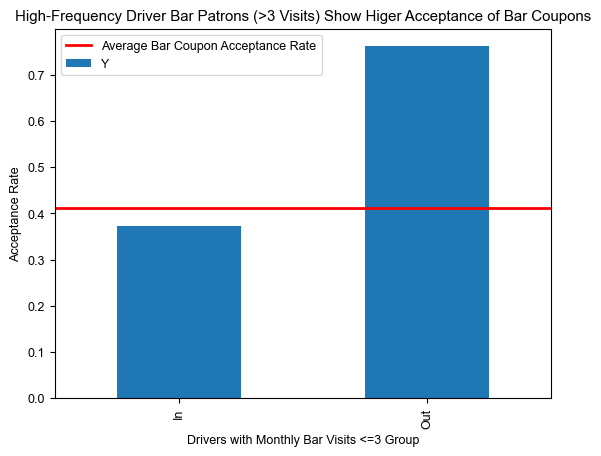

In [38]:
# next step visualize the results using a bar plot
BarCouponOnly.groupby('DriverGroupA_Flag_Bar')['Y'].mean().plot(kind='bar')
plt.title('High-Frequency Driver Bar Patrons (>3 Visits) Show Higer Acceptance of Bar Coupons')
plt.xlabel('Drivers with Monthly Bar Visits <=3 Group')
plt.ylabel('Acceptance Rate')

# add an average line based on the value from step 2
plt.axhline(y=AvgBarCouponAcceptenceRate, color='r', linestyle='-', linewidth=2, label='Average Bar Coupon Acceptance Rate')
plt.legend()
plt.show()


## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [212]:
# slice the data into two groups based on the criteria (DriverGroupB) specified by Question #4
# create a flag column'DriverGroupB_Flag' in the dataframe
# check the statistics
GroupB_Flag_Bar = (BarCouponOnly['Bar'].isin(['1~3', '4-8', 'gt8'])) & (BarCouponOnly['age'].isin(['26', '31', '50plus', '36', '41', '46']))
BarCouponOnly['DriverGroupB_Flag_Bar'] = (GroupB_Flag_Bar).map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rates: ", BarCouponOnly.groupby('DriverGroupB_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rates:  DriverGroupB_Flag_Bar
In     0.656667
Out    0.366127
Name: Y, dtype: float64


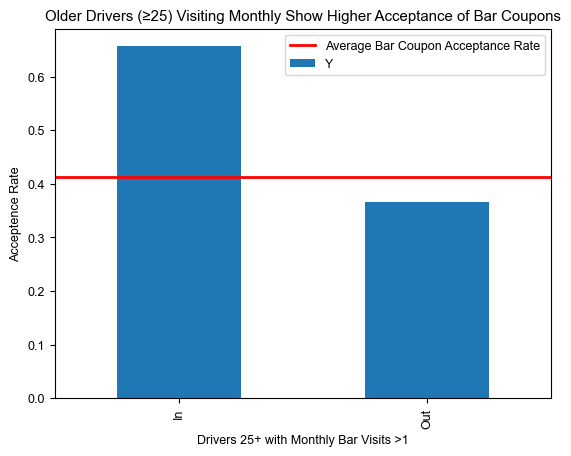

In [49]:
# next step visualize the results
BarCouponOnly.groupby('DriverGroupB_Flag_Bar')['Y'].mean().plot(kind='bar')
plt.title('Older Drivers (≥25) Visiting Monthly Show Higher Acceptance of Bar Coupons')
plt.xlabel('Drivers 25+ with Monthly Bar Visits >1')
plt.ylabel('Acceptence Rate')
plt.axhline(y=AvgBarCouponAcceptenceRate, color='r', linestyle='-', linewidth=2, label='Average Bar Coupon Acceptance Rate')
plt.legend()
plt.show()

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [44]:
# understand the breakdown vaues for 'passanger' and 'occupation' variables using value_counts method and normalize the values.
print(BarCouponOnly['passanger'].value_counts(normalize=True))
print(BarCouponOnly['occupation'].value_counts(normalize=True))

passanger
Alone        0.596445
Friend(s)    0.166231
Partner      0.135912
Kid(s)       0.101411
Name: proportion, dtype: float64
occupation
Unemployed                                   0.152640
Student                                      0.123889
Computer & Mathematical                      0.117616
Sales & Related                              0.091479
Education&Training&Library                   0.065342
Management                                   0.056456
Office & Administrative Support              0.052797
Arts Design Entertainment Sports & Media     0.046001
Business & Financial                         0.042865
Retired                                      0.037114
Healthcare Support                           0.023001
Food Preparation & Serving Related           0.022478
Community & Social Services                  0.020910
Healthcare Practitioners & Technical         0.018819
Transportation & Material Moving             0.018296
Legal                                        0.0

In [50]:
# slice the data into two groups based on the criteria (DriverGroupC) specified by Question #5
# create a flag column'DriverGroupC_Flag' in the dataframe
# check the statistics

GroupC_Flag_Bar = (
    BarCouponOnly['Bar'].isin(['1~3', '4-8', 'gt8']) &
    (BarCouponOnly['passanger'] != 'Kid(s)') &
    (BarCouponOnly['occupation'] != 'Farming Fishing & Forestry')
)
BarCouponOnly['DriverGroupC_Flag_Bar'] = GroupC_Flag_Bar.map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rates: ", BarCouponOnly.groupby('DriverGroupC_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rates:  DriverGroupC_Flag_Bar
In     0.682051
Out    0.342745
Name: Y, dtype: float64


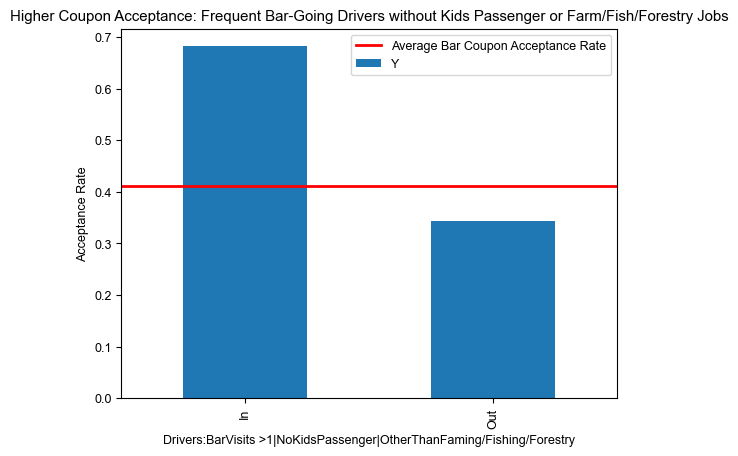

In [52]:
# next step visualize the results to confirm the statistics.
BarCouponOnly.groupby('DriverGroupC_Flag_Bar')['Y'].mean().plot(kind='bar')
plt.title('Higher Coupon Acceptance: Frequent Bar-Going Drivers without Kids Passenger or Farm/Fish/Forestry Jobs')
plt.xlabel('Drivers:BarVisits >1|NoKidsPassenger|OtherThanFaming/Fishing/Forestry')
plt.ylabel('Acceptance Rate')
plt.axhline(y=AvgBarCouponAcceptenceRate, color='r', linestyle='-', linewidth=2, label='Average Bar Coupon Acceptance Rate')
plt.legend()
plt.show()

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [53]:
# understand the breakdown vaues for 'maritalStatus','RestaurantLessThan20', and 'Income' variables using value_counts method and normalize the values.
print(BarCouponOnly['maritalStatus'].value_counts(normalize=True))
print(BarCouponOnly['RestaurantLessThan20'].value_counts(normalize=True))
print(BarCouponOnly['income'].value_counts(normalize=True))


maritalStatus
Married partner      0.435442
Single               0.333508
Unmarried partner    0.184004
Divorced             0.038160
Widowed              0.008887
Name: proportion, dtype: float64
RestaurantLessThan20
1~3      0.438578
4~8      0.286461
less1    0.163095
gt8      0.097229
never    0.014637
Name: proportion, dtype: float64
income
$25000 - $37499     0.156822
$100000 or More     0.147412
$12500 - $24999     0.141662
$50000 - $62499     0.130162
$37500 - $49999     0.129117
Less than $12500    0.083116
$75000 - $87499     0.074752
$87500 - $99999     0.069524
$62500 - $74999     0.067433
Name: proportion, dtype: float64


In [57]:
# slice the data into two groups based on the criteria (DriverGroupD) specified by Question #6.1
# create a flag column'DriverGroup_DFlag' in the dataframe
# check the statistics

GroupD_Flag_Bar = (
    BarCouponOnly['Bar'].isin(['1~3', '4-8', 'gt8']) &
    (BarCouponOnly['passanger'] != "Kid(s)") &
    (BarCouponOnly['maritalStatus'] != 'Widowed')
)
BarCouponOnly['DriverGroupD_Flag_Bar'] = GroupD_Flag_Bar.map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rates: ", BarCouponOnly.groupby('DriverGroupD_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rates:  DriverGroupD_Flag_Bar
In     0.682051
Out    0.342745
Name: Y, dtype: float64


In [55]:
# slice the data into two groups based on the criteria (DriverGroupE) specified by Question #6.2
# create a flag column'DriverGroupE_Flag' in the dataframe
# check the statistics

GroupE_Flag_Bar = (
    BarCouponOnly['Bar'].isin(['1~3', '4-8', 'gt8'])) & (BarCouponOnly['age'].isin(['21', '26', 'below21'])
)
BarCouponOnly['DriverGroupE_Flag_Bar'] = GroupE_Flag_Bar.map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rate: ", BarCouponOnly.groupby('DriverGroupE_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rate:  DriverGroupE_Flag_Bar
In     0.685345
Out    0.374182
Name: Y, dtype: float64


In [60]:
# slice the data into two groups based on the criteria (DriverGroupF) specified by Question #6.2
# create a flag column'DriverGroupF_Flag' in the dataframe
# check the statistics

GroupF_Flag_Bar = (
    BarCouponOnly['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']) &
    BarCouponOnly['RestaurantLessThan20'].isin(['4~8', 'gt8'])
)
BarCouponOnly['DriverGroupF_Flag_Bar'] = GroupF_Flag_Bar.map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rates: ", BarCouponOnly.groupby('DriverGroupF_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rates:  DriverGroupF_Flag_Bar
In     0.456456
Out    0.402532
Name: Y, dtype: float64


In [61]:
# slice the data into two groups based on the criteria (DriverGroupH) specified by Question #6.3
# create a flag column'DriverGroupH_Flag' in the dataframe
# check the statistics

CombinedGroupsH_Flag_Bar = (
    (BarCouponOnly['DriverGroupD_Flag_Bar'] == 'In') |
    (BarCouponOnly['DriverGroupE_Flag_Bar'] == 'In') |
    (BarCouponOnly['DriverGroupF_Flag_Bar'] == 'In')
)
BarCouponOnly['DriverGroupCombinedH_Flag_Bar'] = CombinedGroupsH_Flag_Bar.map({True: 'In', False: 'Out'})
print("Bar Coupon Acceptance Rates: ", BarCouponOnly.groupby('DriverGroupCombinedH_Flag_Bar')['Y'].mean())

Bar Coupon Acceptance Rates:  DriverGroupCombinedH_Flag_Bar
In     0.560372
Out    0.336227
Name: Y, dtype: float64


## 6.1 Plot the super set consists of 3 targeted subgroups specified in Quesion #6 vs. others

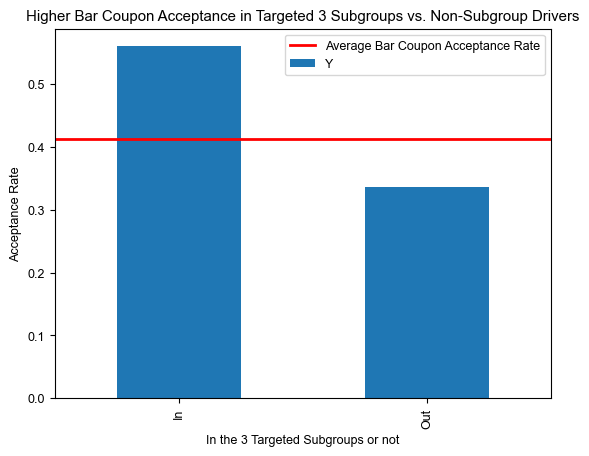

In [73]:
#use panda plot
BarCouponOnly.groupby('DriverGroupCombinedH_Flag_Bar')['Y'].mean().plot(kind='bar')
plt.title('Higher Bar Coupon Acceptance in Targeted 3 Subgroups vs. Non-Subgroup Drivers')
plt.xlabel('In the 3 Targeted Subgroups or not')
plt.ylabel('Acceptance Rate')
plt.axhline(y=AvgBarCouponAcceptenceRate, color='r', linestyle='-', linewidth=2, label='Average Bar Coupon Acceptance Rate')
plt.legend()
plt.show()

## 6.2 compare among the three targeted groups and the super set's coupon acceptance rate

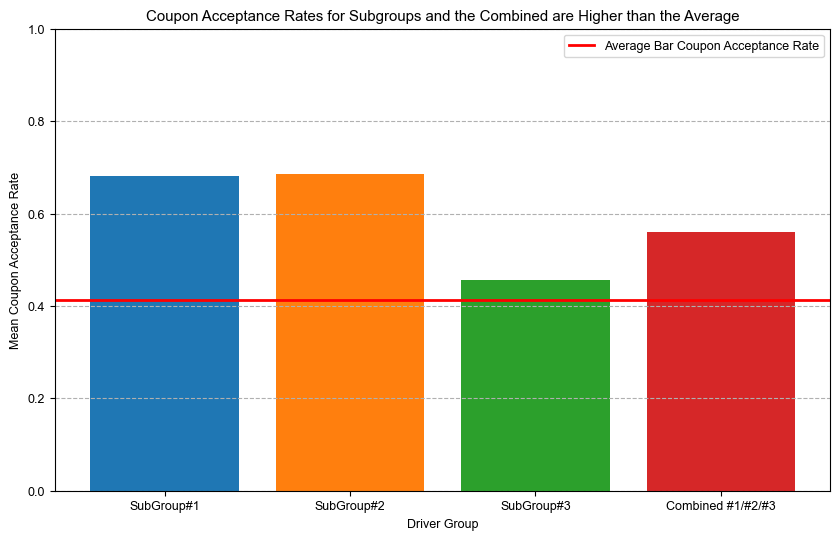

In [71]:
#calculate means for the three targeted subsets and the super set

mean_rate_d = BarCouponOnly[BarCouponOnly['DriverGroupD_Flag_Bar'] == 'In']['Y'].mean()
mean_rate_e = BarCouponOnly[BarCouponOnly['DriverGroupE_Flag_Bar'] == 'In']['Y'].mean()
mean_rate_f = BarCouponOnly[BarCouponOnly['DriverGroupF_Flag_Bar'] == 'In']['Y'].mean()
mean_rate_combined = BarCouponOnly[BarCouponOnly['DriverGroupCombinedH_Flag_Bar'] == 'In']['Y'].mean()

# create a group list for visualization purpose
groups = ['SubGroup#1', 'SubGroup#2', 'SubGroup#3', 'Combined #1/#2/#3']

# create a mean rate list for visulization purpose
mean_rates = [mean_rate_d, mean_rate_e, mean_rate_f, mean_rate_combined]

#plot
plt.figure(figsize=(10, 6))
plt.bar(groups, mean_rates, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Coupon Acceptance Rates for Targeted Subgroups and the Combined are Higher than the Average')
plt.xlabel('Driver Group')
plt.ylabel('Mean Coupon Acceptance Rate')
plt.ylim(0, 1)  # Assuming Y is a binary indicator, so mean rates will be between 0 and 1
plt.xticks(groups)

# change grid style
plt.grid(axis='y', linestyle='--')

# add a constant line
plt.axhline(y=AvgBarCouponAcceptenceRate, color='r', linestyle='-', linewidth=2, label='Average Bar Coupon Acceptance Rate')
plt.legend()
plt.show()

## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


## Major Insights/Hypothesis/Variables Identification

### Bar Visit Frequency, Age, Passenger Presence, Income as critical determinants in coupon acceptance, alongside other significant factors such as Occupation, Marital Status, and Dining Preferences at budget-friendly restaurants.

1)Drivers who visit bars Often (>3 visits) most likely accept Bar Coupons
This suggests that bar coupons promotional efforts targeting drivers who are regular bar-goers could be effective.

2)Older drivers (>26 years old) who are regular bar-goers (>1)tends to accept coupons, indicating that older demographics, particularly those who are frequent bar visitors, are responsive to bar coupon promotions.

3)Regular(>1 visit) bar-goers(driver) without Kids paggagers and not empoloyed in Farming, Fishing, or Forestry Occupations are responsive to bar coupons

4)Regular(>1 visit) bar-goers( widowed drivers) without kids passangers are responsive to bar coupons.
5)Young (<30 years older) and regular bar-goers(drivers) are responsive to bar coupons. life style and saving
6)Low incomed(<50k) drivers who often eats at a restaurant with average expense less than $20 (>4 times a month) are receptive to bar coupons)

7)Regular bar-goers(drivers), particularly those without child passengers, who might dine often at inexpensive restaurants due to income limitations, may exhibit a pattern of behavior that makes them more receptive to accepting coupons. 

This combination of factors: age, the absence of kids passenger, lower income, regular bar visits, or a preference for cheaper dining options—could interplay to influence their increased likelihood of coupon acceptance.


## Coupon Strategy and Actions for Consideration

### 1) Bar Visit Frequency: Targeting regular bar-goers (>1 visits) emerges as a critical strategy. Target on frequent visitors for coupon promotions.

### 2) Age Dynamics:
     1) Older patrons (>26 years) with habitual bar attendance (>1 visit) exhibit a greater probability of coupon use, reflecting their responsiveness to savings and lifestyle habits.
     2) Younger clientele (<30 years), consistent bar visitors, demonstrate a strong inclination towards coupon acceptance, linking lifestyle choices and savings orientation.

### 3) Influence of Passenger, Marital Status, and Occupation:
Bar patrons visiting more than once, not accompanied by children, and outside the Farming, Fishing, or Forestry sectors show a higher propensity for coupon engagement.

### 4) Economic and Dining Behavior:
Lower-income individuals (<$50K) who regularly dine affordably (>4 times a month) display an increased openness to bar coupons, underscoring economic motivations behind coupon acceptance. Promote bar coupon in budgeted restaurants(<20 $)

### 5) Composite Factors:
A blend of no child companions, modest income, frequent bar visits, or favoring budget dining correlates with a heightened coupon acceptance proabability, indicating a multifaceted interplay of demographic, situational, and behavioral influences.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Carry Out Coupon Analysis Conceptual Framework

This analysis divides the factors influencing carry out coupon acceptance into three primary categories: Demographics, Behavioral Factors, and Situational Factors. Each category encompasses various elements that could significantly impact the likelihood of coupon acceptance.

### Demographics
1) Age: Young adults and professionals may have a higher propensity to accept carry out coupons, aligning with their dynamic lifestyles and carry out needs.
2) Occupation: Those in demanding or fast-paced careers could value carry out coupons more, seeing them as beneficial for their daily routines.
3) Income Level: Income may dictate coffee purchasing habits, influencing where individuals prefer to buy their coffee.
4) Marital Status: Marital status might affect coffee consumption habits, potentially influencing coupon acceptance.
5) Has Children: Parenthood could impact daily routines, including coffee consumption and coupon usage.
6) Education: Educational background might correlate with coffee preferences and the likelihood of using coupons.

### Behavioral Factors
1) Destination: The purpose of travel could affect the likelihood of coffee coupon acceptance.
2) visit bars , coffee house or restaurants frequency
2) Time of Coupon: Coupons offered during specific times, such as mornings or mid-week, may have higher acceptance rates, aligning with work commutes..

### Situational Factors
1) weather, such as cold or rain, might increase the appeal of coffee coupons as people seek comfort and warmth.
2) Passenger Presence: The company of passengers with kids or without could influence the decision to accept coffee coupons.
3) Location Proximity and Convience: Proximity to carry out locations, especially for urban residents, could significantly increase coupon acceptance due to convenience.


## 7.1 Create a carry out coupon only data frame and check and drop null values

In [77]:
# Create a Carry Out Coupon Only Data Frame, and check null value
CarryOut = data[data["coupon"] == "Carry out & Take away"]
print("Before Drop null values:", CarryOut.shape)
CarryOut_nulls =CarryOut.isnull().sum() 
# check null values's distributions 
print(CarryOut_nulls)
CarryOut =CarryOut.dropna()
print("after drop null values:", CarryOut.shape)
CarryOut_nulls.info()

Before Drop null values: (2393, 26)
destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     16
CoffeeHouse             32
CarryAway               22
RestaurantLessThan20    18
Restaurant20To50        33
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
Accepted                 0
dtype: int64
after drop null values: (2280, 26)
<class 'pandas.core.series.Series'>
Index: 26 entries, destination to Accepted
Series name: None
Non-Null Count  Dtype
--------------  -----
26 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


## 7.2  Create Correlations Between Numerical Features and Coupon Acceptance

In this phase of the analysis, I focused on evaluating the correlations between various numerical features within our dataset and the propensity for coupon acceptance, identified by numerical values: 1 for acceptance and 0 for rejection.
My investigation into these relationships did not uncover any significant correlations between the examined numerical features and the likelihood of coupon acceptance. Given this outcome, I made a strategic decision to omit all numerical variables from subsequent stages of our analysis, as they did not demonstrate a meaningful impact on the acceptance of coupons.

This analysis indicates a binary classification problem. Further analysis guide the selection of contributing features to compose a predictive model suitable for the coupon dataset.

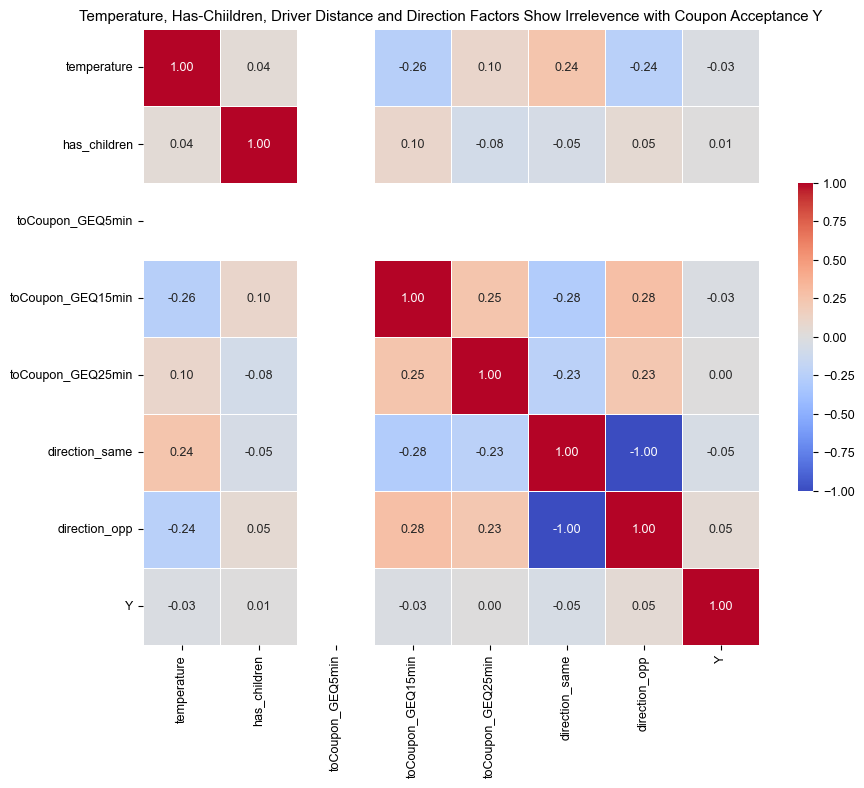

In [260]:
# create a heatmap among all numerical variables using corr()

numerical_carryout = CarryOut.select_dtypes(include=['int64'])  # only include numberical variable using select_dtypes method.
corr = numerical_carryout.corr()  # compute correlations among numerical variables with 'Y' acceptance outcome.

# plot a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Temperature, Has-Chiildren, Driver Distance and Direction Factors Show Irrelevence with Coupon Acceptance Y')
plt.show()

## 7.3  Understand the Relationships between Categorical Variables and Coupon Acceptance
The goal is to identify contributing features for modelling. 

The following data exploration step is to go through all object features in the dataset to see the relatinship between the feature and coupon acceptence

In [197]:
# instead of creating indivdual plots, I create a set of bar charts for all cateogical varibles using a loop function.
# this time I use plotly to plot 

import plotly.express as px
categorical_columnsCarryout = CarryOut.select_dtypes(include=['object']).columns

for col in categorical_columnsCarryout:
    if col != 'Accepted':  # Exclude the 'Accepted' column from the iteration
        fig = px.histogram(CarryOut, x=col, color='Accepted', barmode='group',
                           title=f'Accepted Coupons by {col}',
                           labels={'count': 'Count', 'Accepted': 'Coupon Accepted'})
        fig.update_xaxes(categoryorder='total descending')  # Sort categories by count
        fig.update_layout(xaxis_title=col, yaxis_title='Count',
                          legend_title='Coupon Accepted',
                          xaxis={'categoryorder':'total descending'},
                          title_x=0.5)  # Center the title
        fig.show()

## List of Vairables to be Examined Further

Based on the analysis above and bar coupon example, these factors, either individually or in combination, play a pivotal role in determining the likelihood of coupon redemption.

## 1) Demographics

### -Age: 
Highlights the demographic relevance.

### -Occupation:
Focuses on unemployed individuals, students, and professionals in computer & mathematics, and sales sectors.

### -Income Level: 
Specifically targets drivers with an income of $50k or below.

## 2) Coupon Attributes:

### - Coupon Timing: 
Indicates the importance of when the coupon is offered.

## 3)Situation Factors:

### - Destination: 
Reflects the impact of the driver's intended destination.
### - Passenger Composition and Marital Status
Considers the presence of children as passengers and the marital status of the driver.

##  4)Behavior Factors:

### - Frequency of Carryout Orders: 
Emphasizes drivers who order carryout more than once.
### - Bar Visit Frequency: 
Check the number of visits to bars as a potential factor.
### - Dining at Restaurants with an Average Expense Under20 
Accounts for drivers who frequently dine at more affordable restaurants.
### - Visits to Mid-Range Restaurants ($20-$50): 
Limits the consideration to those visiting such restaurants less than three times


## 7.4 Caculate carry out coupon acceptance rate for the  dataframe

In [100]:
CarryOutCouponAcceptRate = CarryOut["Y"].sum() / CarryOut.shape[0]
print("CarryOut Coupon Acceptance Rate:", CarryOutCouponAcceptRate)

CarryOut Coupon Acceptance Rate: 0.737719298245614


In [195]:

print(CarryOut['maritalStatus'].value_counts(normalize=True))
print(CarryOut['RestaurantLessThan20'].value_counts(normalize=True))
print(CarryOut['Restaurant20To50'].value_counts(normalize=True))
print(CarryOut['income'].value_counts(normalize=True))
print(CarryOut['age'].value_counts(normalize=True))
print(CarryOut['time'].value_counts(normalize=True))
print(CarryOut['passanger'].value_counts(normalize=True))
print(CarryOut['income'].value_counts(normalize=True))
print(CarryOut['education'].value_counts(normalize=True))
print(CarryOut['CarryAway'].value_counts(normalize=True))
print(CarryOut['destination'].value_counts(normalize=True))
print(CarryOut['occupation'].value_counts(normalize=True))

maritalStatus
Married partner      0.397223
Single               0.385132
Unmarried partner    0.162562
Divorced             0.046126
Widowed              0.008957
Name: proportion, dtype: float64
RestaurantLessThan20
1~3      0.426780
4~8      0.285266
less1    0.168831
gt8      0.103000
never    0.016122
Name: proportion, dtype: float64
Restaurant20To50
less1    0.490372
1~3      0.257949
never    0.167936
4~8      0.062696
gt8      0.021048
Name: proportion, dtype: float64
income
$25000 - $37499     0.159875
$12500 - $24999     0.141514
$37500 - $49999     0.138379
$100000 or More     0.138379
$50000 - $62499     0.123153
Less than $12500    0.089118
$75000 - $87499     0.070309
$87500 - $99999     0.070309
$62500 - $74999     0.068966
Name: proportion, dtype: float64
age
21         0.203762
26         0.192566
31         0.163009
50plus     0.146888
36         0.106135
41         0.089566
46         0.052396
below21    0.045678
Name: proportion, dtype: float64
time
7AM     0.308106

## 7.5 Data Analysis Insights

### 1. Age Has No or Minimal Impact on Carryout Coupon Acceptance
Analysis reveals that age does not significantly influence carryout coupon acceptance rates among different age groups. This observation is based on testing various age demographics, where the acceptance rates consistently hovered around the overall average. 
It suggests that the propensity to utilize carryout coupons transcends age barriers, likely reflecting a lifestyle choice prevalent across all age cohorts. check out the sample analysis below.

In [254]:
## again create age groups subset

CarryOut.loc[:, 'OlderAgeGroups'] = CarryOut['age'].isin(['26', '31','36','41','46','50plus']).map({True: 'In', False: 'Out'})
print("Carry Out Coupon Acceptance Rates: ", CarryOut.groupby('OlderAgeGroups')['Y'].mean())

Carry Out Coupon Acceptance Rates:  OlderAgeGroups
In     0.735680
Out    0.736086
Name: Y, dtype: float64


In [253]:
CarryOut.loc[:, 'YoungerAgeGroups'] = CarryOut['age'].isin(['21', 'below21']).map({True: 'In', False: 'Out'})
print("Carry Out Coupon Acceptance Rates: ", CarryOut.groupby('YoungerAgeGroups')['Y'].mean())

Carry Out Coupon Acceptance Rates:  YoungerAgeGroups
In     0.736086
Out    0.735680
Name: Y, dtype: float64


### 2.Ocupation  impacts carry out coupon acceptance. 
Occupation plays a considerable role in the preference for carryout coupons, primarily due to varying work schedules. Individuals in certain professions, particularly those with demanding or strict schedules, show a higher inclination towards carryout options. Conversely, groups such as students, tech professionals, and sales personnel, who often benefit from more flexible schedules, exhibit a lower propensity for carryout coupon usage. This pattern suggests that the acceptance of carryout coupons is closely linked to the demands and flexibility of one’s professional commitments.
 

In [215]:
## create a subset for student, computer and sales folks

Occupation_Flag_CarryOut = CarryOut['occupation'].isin([ 'Student', 'Computer & Mathematical', 'Sales & Related']) 

# This time I use Use .loc to create or modify 'Occupation_Flag_CarryOut' column with the condition
CarryOut.loc[:, 'Occupation_Flag_CarryOut'] = Occupation_Flag_CarryOut.map({True: 'In', False: 'Out'})

# Calculate and print the CarryOut Coupon Acceptance Rate by 'Occupation_Flag_CarryOut'
print("CarryOut Coupon Acceptance Rate: ", CarryOut.groupby('Occupation_Flag_CarryOut')['Y'].mean())


CarryOut Coupon Acceptance Rate:  Occupation_Flag_CarryOut
In     0.696845
Out    0.754654
Name: Y, dtype: float64


### 3. Income's Influence on Carryout Coupon Acceptance
Income levels significantly affect the likelihood of accepting carryout coupons. Individuals with lower incomes are more inclined to utilize carryout coupons compared to their higher-income counterparts. This trend underscores the importance of income as a determining factor in the adoption of carryout coupon usage.

In [216]:
## create a subset for low incomed drivers
DriverwithLowerIncome = CarryOut['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', '$50000 - $62499', 'Less than $12500'])

# Use .loc to assign 'In' or 'Out' based on the income criteria
CarryOut.loc[:, 'DriverwithLowerIncome'] = DriverwithLowerIncome.map({True: 'In', False: 'Out'})

# Calculate and print the CarryOut Coupon Acceptance Rates by 'DriverwithLowerIncome'
print("CarryOut Coupon Acceptance Rates: ", CarryOut.groupby('DriverwithLowerIncome')['Y'].mean())


CarryOut Coupon Acceptance Rates:  DriverwithLowerIncome
In     0.756181
Out    0.697555
Name: Y, dtype: float64


## 4.Income and Occupation are Key Demorgraphics Determinants in Carryout Coupon Acceptance
Individuals with lower incomes or specific occupational backgrounds (not students and computer folks) exhibit a marked preference for carryout coupons, motivated by economic savings and convenience. This trend highlights how financial considerations and job nature synergistically influence the likelihood of embracing carryout options.


In [217]:
Income_Occupation_carryout = ((CarryOut['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', '$50000 - $62499', 'Less than $12500'])) | 
             (~CarryOut['occupation'].isin(['Unemployed''Student', 'Computer & Mathematical'])))

# Use .loc to assign 'In' or 'Out' based on the condition, for all rows
CarryOut.loc[:, 'Income_Occupation_carryout'] = Income_Occupation_carryout.map({True: 'In', False: 'Out'})

# Calculate and print the Coffee Coupon Acceptance Rates by 'Income_Occupation_carryout'
print("Carry Out Coupon Acceptance Rates: ", CarryOut.groupby('Income_Occupation_carryout')['Y'].mean())

Carry Out Coupon Acceptance Rates:  Income_Occupation_carryout
In     0.742612
Out    0.629630
Name: Y, dtype: float64


Text(0, 0.5, 'Acceptance Rate')

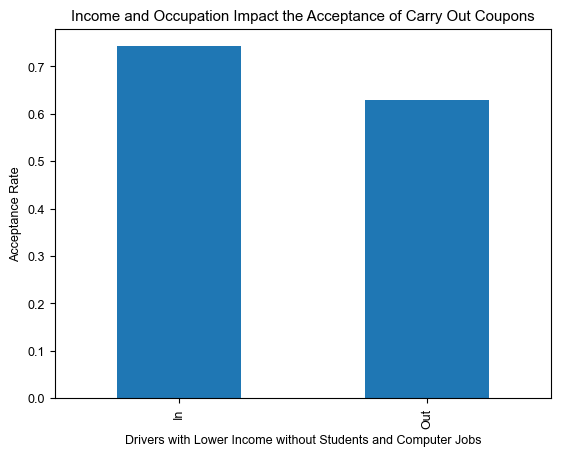

In [272]:
CarryOut.groupby('Income_Occupation_carryout')['Y'].mean().plot(kind='bar')
plt.title('Income and Occupation Impact the Acceptance of Carry Out Coupons')
plt.xlabel('Drivers with Lower Income without Students and Computer Jobs')
plt.ylabel('Acceptance Rate')

## 5.Destination, Income, and Occupation Impact on Carryout Coupon Acceptance
Individuals with no immediate destination, coupled with lower income levels and occupations outside of student and computer/mathematical fields, are more likely to accept carryout coupons compared to the average. This trend suggests that the combination of having flexible travel plans, economic considerations, and specific job categories significantly influences the propensity to opt for carryout offerings. The preference for carryout among these groups may reflect a strategic choice for convenience and cost-saving, particularly when there is no pressing need to be at a particular place

In [233]:
## create the bucket
Destination_Income_Occupations = (
    CarryOut['destination'] == 'No Urgent Place')& ((CarryOut['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', '$50000 - $62499', 'Less than $12500']))
             &(~CarryOut['occupation'].isin(['Student', 'Computer & Mathematical'])))

CarryOut.loc[:, 'Destination_Income_Occupations'] = Destination_Income_Occupations.map({True: 'In', False: 'Out'})

# Calculate and print the CarryOut Coupon Acceptance Rates by 'Destination_Income_Occupations'
print("CarryOut Coupon Acceptance Rates: ", CarryOut.groupby('Destination_Income_Occupations')['Y'].mean())

CarryOut Coupon Acceptance Rates:  Destination_Income_Occupations
In     0.791489
Out    0.720930
Name: Y, dtype: float64


## 6.Passenger and Marital Status Influence on Carryout Coupon Acceptance
The decision to accept carryout coupons is notably affected by the presence of passengers and the individual's marital status. Specifically, those identified as 'Divorced' or 'Widowed' show a higher preference for carryout options. Conversely, drivers accompanied by child passengers tend to decline carryout coupon offers. 

### This behavior can be attributed to psychological factors where:
*** 1)Individuals may prefer solitude or avoid social interactions during certain life stages.
*** 2)Dining out with children is often viewed as a valuable social activity, offering quality time outside the home rather than opting for carryout.

These insights highlight the complex interplay between social circumstances and dining preferences, influencing coupon acceptance behavior.

In [256]:
CarryOut.loc[:, 'passengerorMarital'] = (
    (CarryOut['passanger'] !='Kid(s)')
     |
    (CarryOut['maritalStatus'].isin(['Divorced', 'Widowed']))
).map({True: 'In', False: 'Out'})

print("Carry Coupon Acceptance Rates: ", CarryOut.groupby('passengerorMarital')['Y'].mean())

Carry Coupon Acceptance Rates:  passengerorMarital
In     0.738322
Out    0.696296
Name: Y, dtype: float64


## 7. Impact of Destination and Coupon Timing on Carryout Coupon Acceptance
Drivers/Professionals exhibit a preference for utilizing carryout options outside of work hours, driven by convenience. 
This trend underscores the significant influence of both the intended destination and the timing of coupon offers on the acceptance of carryout coupons. The choice to opt for carryout during non-working hours suggests a strategic decision to maximize time efficiency and convenience in personal schedules.

In [235]:
CarryOut.loc[:, 'Destination_CouponTime'] = (
    ((CarryOut['destination'].isin(['No Urgent Place','Home'])) & 
    (~CarryOut['time'].isin(['7AM', '10AM', '2PM'])))
).map({True: 'In', False: 'Out'})

# Calculate and print the CarryOut Coupon Acceptance Rates by 'Destination_CouponTime'
print("CarryOut Coupon Acceptance Rates: ", CarryOut.groupby('Destination_CouponTime')['Y'].mean())

CarryOut Coupon Acceptance Rates:  Destination_CouponTime
In     0.792453
Out    0.701083
Name: Y, dtype: float64


Text(0, 0.5, 'Acceptance Rate')

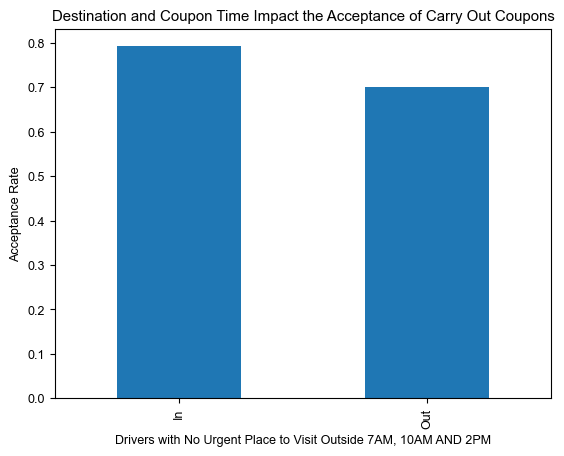

In [273]:
CarryOut.groupby('Destination_CouponTime')['Y'].mean().plot(kind='bar')
plt.title('Destination and Coupon Time Impact the Acceptance of Carry Out Coupons')
plt.xlabel('Drivers with No Urgent Place to Visit Outside 7AM, 10AM AND 2PM')
plt.ylabel('Acceptance Rate')

## 8.Similar Insights from Bar Coupon Analysis: Sligtly Higher Coupon Acceptance Among Regular Carryout Drivers
The analysis reveals that drivers who frequently opt for carryout are more inclined to accept coupons. This trend suggests a correlation between regular carryout habits and a positive response to coupon offers, possibly due to heightened receptivity to savings opportunities among these consumers.

In [266]:
CarryOut.loc[:, 'CarryA_Flag_A'] = CarryOut['CarryAway'].isin(['gt8', '4~8', '1~3']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'CarryA_Flag_A'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('CarryA_Flag_A')['Y'].mean())

Carryaway Acceptance Rates:  CarryA_Flag_A
In     0.745989
Out    0.683196
Name: Y, dtype: float64


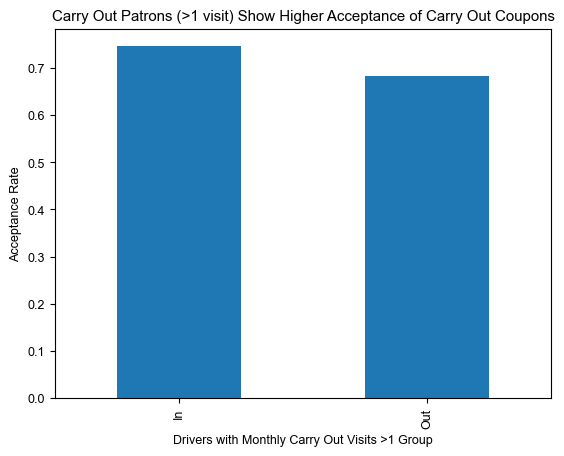

In [269]:
# plot the probability using panda plot
CarryOut.groupby('CarryA_Flag_A')['Y'].mean().plot(kind='bar')
plt.title('Carry Out Patrons (>1 visit) Show Higher Acceptance of Carry Out Coupons')
plt.xlabel('Drivers with Monthly Carry Out Visits >1 Group')
plt.ylabel('Acceptance Rate')

# add an average line based on the value from step 2

plt.show()

## 9.  Carryout Coupon Usage Among Infrequent Coffee House Patrons
Infrequent visitors to coffee houses are more likely to utilize carryout coupons. This pattern may indicate that those who do not regularly frequent coffee establishments view carryout coupons as a compelling incentive to make a purchase, potentially due to perceived value or the opportunity to try something new with reduced financial risk.

In [236]:
CarryOut.loc[:, 'CoffeeNonFrequentVisitors'] = CarryOut['CoffeeHouse'].isin(['never', 'less1']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'CoffeeNonFrequentVisitors'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('CoffeeNonFrequentVisitors')['Y'].mean())

Carryaway Acceptance Rates:  CoffeeNonFrequentVisitors
In     0.758193
Out    0.712862
Name: Y, dtype: float64


## 10. Bar Visitation Frequency Unrelated to Carry Out Coupon Acceptance
The frequency of bar visits appears to have no significant impact on coupon acceptance. This observation holds true whether an individual is a frequent bar patron or not, indicating that bar visitation habits do not necessarily correlate with the likelihood of utilizing carry out coupons.

In [239]:
CarryOut.loc[:, 'BarFrequentVisitors'] = CarryOut['Bar'].isin(['4~8', 'gt8', '1~3']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'BarNonFrequentVisitors'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('BarFrequentVisitors')['Y'].mean())

Carryaway Acceptance Rates:  BarFrequentVisitors
In     0.733719
Out    0.736706
Name: Y, dtype: float64


In [240]:
CarryOut.loc[:, 'BarNonFrequentVisitors'] = CarryOut['Bar'].isin(['never', 'less1']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'BarNonFrequentVisitors'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('BarNonFrequentVisitors')['Y'].mean())

Carryaway Acceptance Rates:  BarNonFrequentVisitors
In     0.736706
Out    0.733719
Name: Y, dtype: float64


## 11. No Correlation Between Restaurant Visit Frequency and Carryout Coupon Usage
The frequency of restaurant visits, whether to upscale or budget establishments, does not influence carryout coupon acceptance. This finding suggests that dining out habits, irrespective of the restaurant's price range, are not indicative of a customer's propensity to use carryout coupons

In [246]:
CarryOut.loc[:, 'BudgetRestaurantVisitless'] = CarryOut['Restaurant20To50'].isin(['never', 'less1']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'BudgetRestaurantVisitless'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('BudgetRestaurantVisitless')['Y'].mean())

Carryaway Acceptance Rates:  BudgetRestaurantVisitless
In     0.734694
Out    0.737877
Name: Y, dtype: float64


In [247]:
CarryOut.loc[:, 'BudgetRestaurantVisitmore'] = CarryOut['Restaurant20To50'].isin(['4~8', 'gt8', '1~3']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'CarryA_Flag_A'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('BudgetRestaurantVisitmore')['Y'].mean())

Carryaway Acceptance Rates:  BudgetRestaurantVisitmore
In     0.737877
Out    0.734694
Name: Y, dtype: float64


In [248]:
CarryOut.loc[:, 'UpscaleRestaurantVisitmore'] = CarryOut['RestaurantLessThan20'].isin(['4~8', 'gt8', '1~3']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'UpscaleRestaurantVisitmore'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('UpscaleRestaurantVisitmore')['Y'].mean())

Carryaway Acceptance Rates:  UpscaleRestaurantVisitmore
In     0.736813
Out    0.731235
Name: Y, dtype: float64


In [249]:
CarryOut.loc[:, 'UpscaleRestaurantVisitless'] = CarryOut['RestaurantLessThan20'].isin(['never', 'less1']).map({True: 'In', False: 'Out'})

# Calculate and print the Carryaway Acceptance Rates by 'UpscaleRestaurantVisitless'
print("Carryaway Acceptance Rates: ", CarryOut.groupby('UpscaleRestaurantVisitless')['Y'].mean())

Carryaway Acceptance Rates:  UpscaleRestaurantVisitless
In     0.731235
Out    0.736813
Name: Y, dtype: float64
